ข้อ 1

Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes

Descriptive statistics of the dataset:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


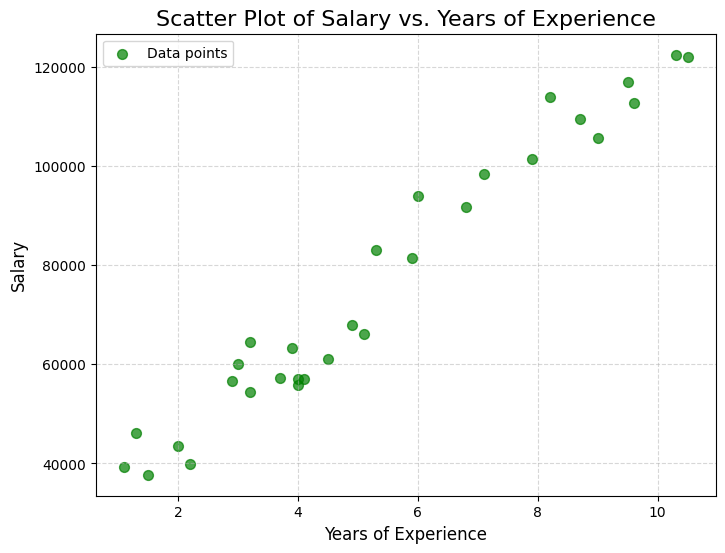


Correlation matrix of the dataset:
                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000

Mean squared error: 31270951.7222810


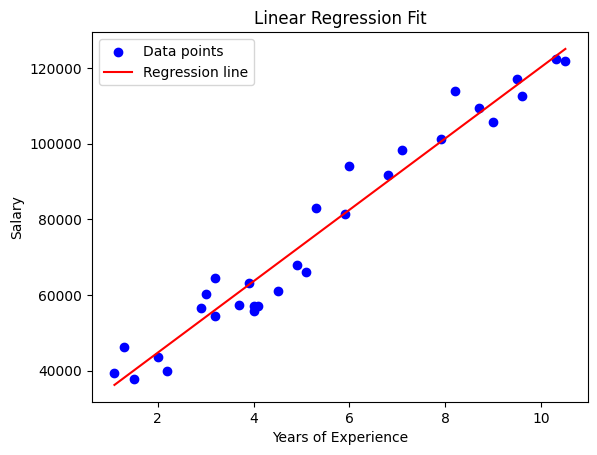


Observation:
The scatter plot shows a positive linear relationship between Years of Experience and Salary. The regression line fits the data well, indicating that the model captures the trend effectively. Some points may deviate from the line, suggesting potential noise or outliers in the data.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# อ่านข้อมูลจากไฟล์ CSV
data = pd.read_csv('Salary_Data.csv')

# เขียนโปรแกรมเรียกดู information ของข้อมูลพร้อมทั้งแสดงผลลัพธ์
print("Information of the dataset:")
data.info()

# เขียนโปรแกรมแสดงค่ำสถิติเบื้องต้นของทุก column ของข้อมูลพร้อมทั้งแสดงผลลัพธ์
print("\nDescriptive statistics of the dataset:")
print(data.describe())

# แปลงข้อมูลเป็น numpy arrays
x = data['YearsExperience'].to_numpy().reshape(-1, 1)
y = data['Salary'].to_numpy().reshape(-1, 1)

# เขียนโปรแกรม plot graph แสดงผล scatter data ของข้อมูล
plt.figure(figsize=(8, 6))  # กำหนดขนาดกราฟ
plt.scatter(x, y, color='green', s=50, alpha=0.7, label='Data points')  # เพิ่ม alpha และปรับขนาดจุด
plt.grid(True, linestyle='--', alpha=0.5)  # เพิ่ม grid
plt.title('Scatter Plot of Salary vs. Years of Experience', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.legend(fontsize=10)
plt.show()

# เขียนโปรแกรมแสดงผล correlation matrix ของข้อมูล
print("\nCorrelation matrix of the dataset:")
print(data.corr())

# คำนวณค่าที่จำเป็นสำหรับสมการเชิงเส้น (y = mx + b)
n = x.size
upper_eq = np.sum((x - np.mean(x)) * (y - np.mean(y)))  # ส่วน numerator
lower_eq = np.sum((x - np.mean(x)) ** 2)  # ส่วน denominator

m = upper_eq / lower_eq  # คำนวณค่าสัมประสิทธิ์ m
b = np.mean(y) - m * np.mean(x)  # คำนวณค่า intercept b

# ทำนายค่า y จากสมการเชิงเส้น
y_pre = m * x + b

# แสดงค่า Mean Squared Error (MSE)
print("\nMean squared error: %.7f" % mean_squared_error(y, y_pre))

# Plot graph ของสมการเชิงเส้น
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pre, "r-", label='Regression line')
plt.title('Linear Regression Fit')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

# อธิบายลักษณะของข้อมูลเปรียบเทียบกับผลของกราฟ
print("\nObservation:")
print("The scatter plot shows a positive linear relationship between Years of Experience and Salary. The regression line fits the data well, indicating that the model captures the trend effectively. Some points may deviate from the line, suggesting potential noise or outliers in the data.")



In [18]:
# คำนวณหาสมการเชิงเส้นตรง 𝑦=𝑚𝑥+𝑏 y=mx+b โดยใช้ข้อมูลจากไฟล์ Salary_Data.csv
# m: ความชันของเส้นตรง (slope)
# 𝑏: จุดตัดแกน 𝑦y (intercept)
import numpy as np
import pandas as pd

# อ่านข้อมูลจากไฟล์ CSV
data = pd.read_csv('Salary_Data.csv')

# แปลงข้อมูลเป็น numpy arrays
x = data['YearsExperience'].to_numpy()
y = data['Salary'].to_numpy()

# คำนวณค่าที่จำเป็นสำหรับสมการเชิงเส้น (y = mx + b)
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x_squared = np.sum(x**2)

# คำนวณค่า m และ b ตามสูตร
m_formula = (sum_xy - (sum_x * sum_y) / n) / (sum_x_squared - (sum_x**2) / n)
b_formula = np.mean(y) - m_formula * np.mean(x)

# แสดงสมการเชิงเส้น
print(f"คำนวณค่า m")
print(m_formula)
print(f"คำนวณค่า b")
print(b_formula)
print(f"\nLinear Regression Equation: Salary = {m_formula:.2f} * YearsExperience + {b_formula:.2f}")


คำนวณค่า m
9449.962321455081
คำนวณค่า b
25792.200198668666

Linear Regression Equation: Salary = 9449.96 * YearsExperience + 25792.20


In [19]:
# รับค่ำจำก user เป็นตัวแปร ‘YearsExperience’ และแสดงผลลัพธ์ ‘Salary’
import numpy as np
import pandas as pd

# ค่าที่คำนวณได้จากสมการเชิงเส้นตรง
m_formula = 9449.962321455081
b_formula = 25792.200198668666

def calculate_salary(years_experience):
    """
    คำนวณเงินเดือนจากจำนวนปีประสบการณ์ โดยใช้สมการเชิงเส้น
    Salary = m * YearsExperience + b
    """
    salary = m_formula * years_experience + b_formula
    return salary

# รับค่าปีประสบการณ์จากผู้ใช้
try:
    years_experience = float(input("กรุณาป้อนจำนวนปีประสบการณ์ (YearsExperience): "))
    salary = calculate_salary(years_experience)
    print(f"\nวิธีคำนวณ: Salary = {m_formula:.2f} * {years_experience} + {b_formula:.2f}")
    print(f"ผลลัพธ์: เงินเดือนที่คาดการณ์คือ {salary:.2f} บาท")
except ValueError:
    print("กรุณาป้อนตัวเลขที่ถูกต้อง!")


วิธีคำนวณ: Salary = 9449.96 * 10.0 + 25792.20
ผลลัพธ์: เงินเดือนที่คาดการณ์คือ 120291.82 บาท


ข้อ 2

Theta values:
[[25792.20019867]
 [ 9449.96232146]]
Mean squared error2: 31270951.7222810


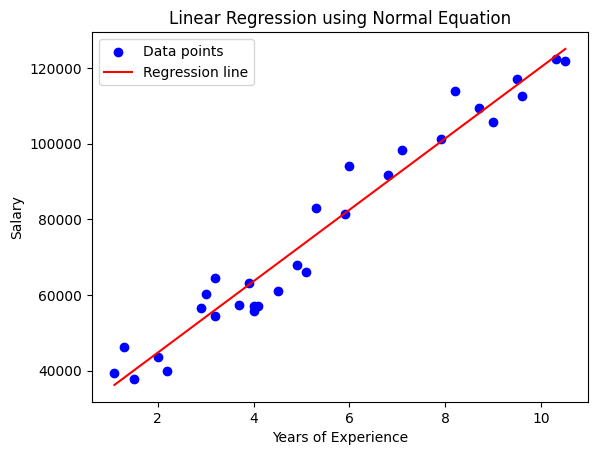

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# อ่านข้อมูลจากไฟล์ CSV
data = pd.read_csv('Salary_Data.csv')

# แปลงข้อมูลเป็น numpy arrays
x = data['YearsExperience'].to_numpy().reshape(-1, 1)
y = data['Salary'].to_numpy().reshape(-1, 1)

# สร้างเมทริกซ์ X โดยเพิ่ม bias term (คอลัมน์ของ 1)
X = np.hstack((np.ones((x.shape[0], 1)), x))

# คำนวณ theta โดยใช้ Normal Equation: theta = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Theta values:")
print(theta)

# ทำนายค่า y โดยใช้ theta
y_pre = X.dot(theta)

# คำนวณ Mean Squared Error
print("Mean squared error2: %.7f" % mean_squared_error(y, y_pre))

# Plot scatter data และเส้น regression line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pre, "r-", label='Regression line')
plt.title('Linear Regression using Normal Equation')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [22]:
# รับค่าจากผู้ใช้ (จำนวนปีประสบการณ์) และคำนวณเงินเดือนตามสมการที่ได้
# สมการที่ได้จากการคำนวณ
theta_0 = 25792.20  # ค่า intercept (เงินเดือนพื้นฐาน)
theta_1 = 9449.96   # ค่า slope (การเพิ่มของเงินเดือนต่อปีประสบการณ์)

# รับค่า Years of Experience จากผู้ใช้
years_experience = float(input("กรุณากรอกจำนวนปีประสบการณ์ (Years of Experience): "))

# คำนวณเงินเดือนจากสมการ Y = θ0 + θ1 * X
predicted_salary = theta_0 + (theta_1 * years_experience)

# แสดงผลลัพธ์
print(f"\nจากจำนวนปีประสบการณ์ {years_experience:.1f} ปี")
print(f"คาดการณ์เงินเดือน (Salary): {predicted_salary:,.2f} บาท")



จากจำนวนปีประสบการณ์ 4.0 ปี
คาดการณ์เงินเดือน (Salary): 63,592.04 บาท


ข้อ 3

Intercept: [25792.20019867]
Coefficient: [[9449.96232146]]
Mean squared error: 31270951.722


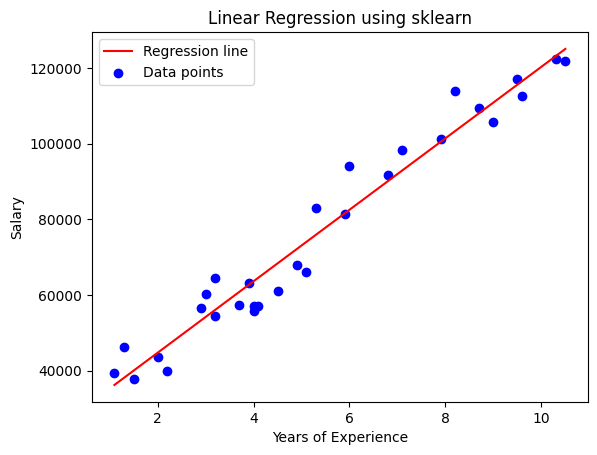


Linear Equation:
y = 25792.200 + 9449.962x


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# อ่านข้อมูลจากไฟล์ CSV
data = pd.read_csv('Salary_Data.csv')

# เตรียมข้อมูลสำหรับการวิเคราะห์
x = np.array(data['YearsExperience'])
y = np.array(data['Salary'])
X = x.reshape(-1, 1)  # Reshape เป็น 2D array
Y = y.reshape(-1, 1)  # Reshape เป็น 2D array

# สร้างโมเดล Linear Regression
model = LinearRegression()
model.fit(X, Y)

# แสดงค่า intercept และ coefficient
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# ทำนายค่า y โดยใช้โมเดล
y_pre = model.predict(X)

# คำนวณ Mean Squared Error
print("Mean squared error: %.3f" % mean_squared_error(y_pre, Y))

# Plot graph แสดงผลลัพธ์
plt.plot(X, y_pre, "r-", label='Regression line')  # เส้น regression
plt.scatter(X, Y, color='blue', label='Data points')  # จุดข้อมูล
plt.title('Linear Regression using sklearn')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

# สมการ Linear Equation
print("\nLinear Equation:")
print(f"y = {model.intercept_[0]:.3f} + {model.coef_[0][0]:.3f}x")


In [23]:
# สมการเชิงเส้นตรง: y = 25792.200 + 9449.962x

# รับค่า x (Years of Experience) จากผู้ใช้
x = float(input("กรุณากรอกจำนวนปีประสบการณ์ (x): "))

# คำนวณ y (Salary) จากสมการ
y = 25792.200 + 9449.962 * x

# แสดงผลลัพธ์
print(f"\nจากจำนวนปีประสบการณ์ {x:.1f} ปี")
print(f"คาดการณ์เงินเดือน (Salary): {y:,.2f} บาท")



จากจำนวนปีประสบการณ์ 6.0 ปี
คาดการณ์เงินเดือน (Salary): 82,491.97 บาท


ข้อ 4


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

Dataset Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Scatter Plot:


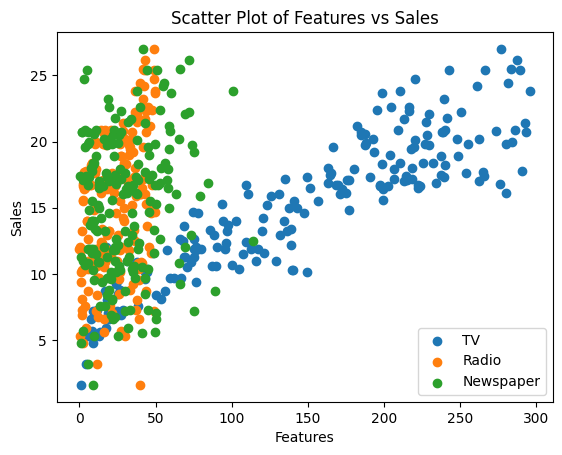


Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000

=== Linear Regression for TV ===
Intercept: 6.675455560633591
Coefficient: 0.057745920931948795
Mean squared error: 6.041
R-squared value: 0.7651379928818158


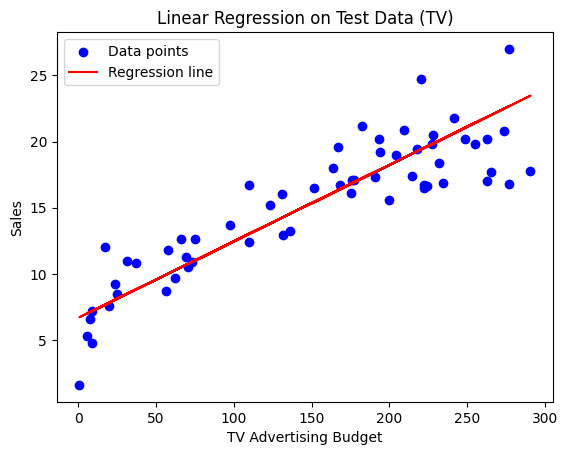


=== Linear Regression for Radio ===
Intercept: 11.366776963507363
Coefficient: 0.16167025023530995
Mean squared error: 28.829
R-squared value: -0.12071488543069608


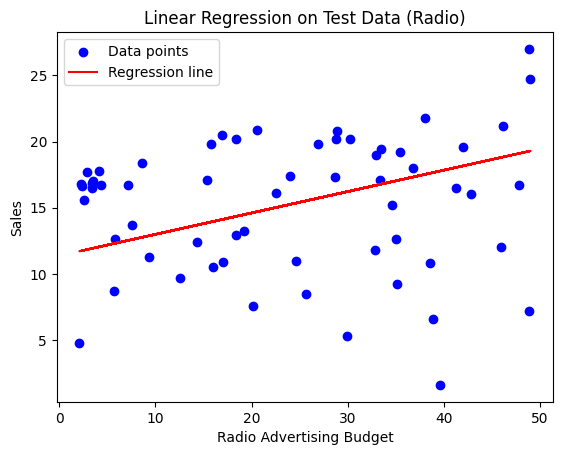


=== Linear Regression for Newspaper ===
Intercept: 13.476791624281654
Coefficient: 0.05268474632931712
Mean squared error: 26.699
R-squared value: -0.03791609392923667


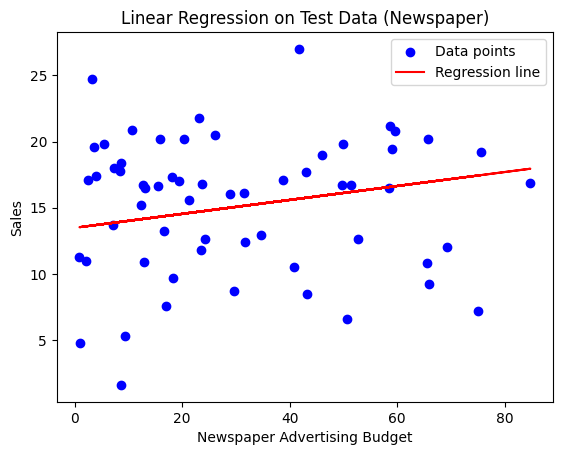

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# อ่านข้อมูลจากไฟล์ CSV
data = pd.read_csv('sales.csv')

# แสดง information ของข้อมูล
print("\nDataset Information:")
data.info()

# แสดงค่าสถิติเบื้องต้นของทุก column
print("\nDataset Statistics:")
print(data.describe())

# แสดงผล scatter plot ของข้อมูลทุก column
print("\nScatter Plot:")
for column in data.columns:
    if column != 'Sales':
        plt.scatter(data[column], data['Sales'], label=column)
plt.title('Scatter Plot of Features vs Sales')
plt.xlabel('Features')
plt.ylabel('Sales')
plt.legend()
plt.show()

# แสดง correlation matrix
print("\nCorrelation Matrix:")
print(data.corr())

# ฟีเจอร์ที่ต้องการวิเคราะห์
features = ['TV', 'Radio', 'Newspaper']

# ลูปสำหรับการสร้างโมเดล Linear Regression สำหรับแต่ละฟีเจอร์
for feature in features:
    print(f"\n=== Linear Regression for {feature} ===")
    
    # เตรียมข้อมูล
    X = np.array(data[feature]).reshape(-1, 1)  # ใช้คอลัมน์ปัจจุบันเป็น feature
    Y = np.array(data['Sales']).reshape(-1, 1)  # ใช้คอลัมน์ 'Sales' เป็น target

    # แบ่งข้อมูลเป็นชุด train และ test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=2)

    # สร้างโมเดล Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # แสดงค่า intercept และ coefficient
    print("Intercept:", model.intercept_[0])
    print("Coefficient:", model.coef_[0][0])

    # ทำนายค่า y โดยใช้ชุดทดสอบ
    y_pre = model.predict(X_test)

    # คำนวณ Mean Squared Error และ R-squared
    print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pre))
    print('R-squared value:', r2_score(y_test, y_pre))

    # Plot graph แสดงผล scatter data และ regression line
    plt.scatter(X_test, y_test, color='blue', label='Data points')
    plt.plot(X_test, y_pre, "r-", label='Regression line')  # เส้น regression
    plt.title(f'Linear Regression on Test Data ({feature})')
    plt.xlabel(f'{feature} Advertising Budget')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()
